## Pandas
- Panel Datas의 약자

1. 다양한 파일 형식 지원
2. 데이터 정제 및 조작에 특화된 라이브러리
    - 데이터 이상치, 결측치, 중복 제거 등 다양한 기능을 제공
    - 데이터 필터링, 병합, 피벗 등을 지원하여 복잡한 데이터를 손쉽게 분석
3. DataFrame,Series 자료구조 지원
    - DataFrame : 2차원 이상
    - Series : 1차원
    - ndarray를 활용하여 만든 자료 구조이기 때문에 NumPy Library와 상호작용이 뛰어남

In [1]:
from tqdm import tqdm as tq
import numpy as np
import pandas as pd

In [2]:
x = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]])
x

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [3]:
y = pd.Series([0,1,2,3],[0,4,5,6])
y

0    0
4    1
5    2
6    3
dtype: int64

In [4]:
y.index = ['A','B','C','D']
y

A    0
B    1
C    2
D    3
dtype: int64

In [5]:
y.iloc[0:2]

A    0
B    1
dtype: int64

### 1.Series 다루기
#### 1.1 Series 생성

In [6]:
#pd.Series(시퀀스 자료구조)

pop = pd.Series([9668465, 3391946, 2642828, 1450062],index =['서울','부산','인천','광주'])
pop

서울    9668465
부산    3391946
인천    2642828
광주    1450062
dtype: int64

In [7]:
#파이썬은 사실 모든 자료가 "객체"형태임
#원본은 복사했다고 생각하고, 복제 변수명에 대입해서 사용했더니,
#같은 객체를 가리키게 되서 원본 유지가 안 된다...
#그래서 copy() 함수를 사용해서 복제본을 만들고, 원본을 유지할 수 있다.

pop2 = pop.copy()
pop2[2] = 1

print(pop2)
print(pop)

서울    9668465
부산    3391946
인천          1
광주    1450062
dtype: int64
서울    9668465
부산    3391946
인천    2642828
광주    1450062
dtype: int64


#### 1.2 Series 속성

In [8]:
#Series 값 확인
display(pop.values)
display(pop.array)

array([9668465, 3391946, 2642828, 1450062], dtype=int64)

<PandasArray>
[9668465, 3391946, 2642828, 1450062]
Length: 4, dtype: int64

In [9]:
#Series 인덱스 확인
pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [10]:
#Series 자료형 확인
pop.dtype

dtype('int64')

In [11]:
#Series type 확인
type(pop)

pandas.core.series.Series

In [12]:
#Series에 이름 지정 => 컬럼명 지정
#Series는 DataFrame에서 열을 하나 떼은 것과 같음

pop.name = '인구'
pop

서울    9668465
부산    3391946
인천    2642828
광주    1450062
Name: 인구, dtype: int64

In [13]:
#Series에 index 이름 지정
pop.index.name = '도시'
pop

도시
서울    9668465
부산    3391946
인천    2642828
광주    1450062
Name: 인구, dtype: int64

In [14]:
#Series 연산
pop/1000000

도시
서울    9.668465
부산    3.391946
인천    2.642828
광주    1.450062
Name: 인구, dtype: float64

In [15]:
icecream = pd.Series([500,800,200],index=['메로나','누가바','빠삐코'])
icecream

메로나    500
누가바    800
빠삐코    200
dtype: int64

In [16]:
icecream.name = '아이스크림'
icecream.index.name = '종류'

icecream

종류
메로나    500
누가바    800
빠삐코    200
Name: 아이스크림, dtype: int64

#### 1.3 Series 인덱싱,슬라이싱

In [17]:
#Series 인덱싱 => 딕셔너리(Key값)처럼 index 이름으로 접근 가능
pop[1],pop['부산']

(3391946, 3391946)

In [18]:
#Series 다중인덱싱
pop[[0,3,1]]

도시
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64

In [19]:
pop[['서울','광주','부산']]

도시
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64

#### 1.4 iloc와 loc 속성
- iloc(integer location) : "행번호"를 가지고 값을 인덱싱하는 방법
- loc(location) : "인덱스 이름"을 가지고 값을 인덱싱하는 방법
- iloc,loc : 함수가 아닌 속성

In [20]:
#iloc 인덱싱 => "행번호" 접근
pop.iloc[0]

9668465

In [21]:
#iloc 슬라이싱
pop.iloc[:2]

도시
서울    9668465
부산    3391946
Name: 인구, dtype: int64

In [22]:
#loc 인덱싱 => "인덱스 이름"으로 접근
pop.loc['부산']

3391946

In [23]:
#loc 슬라이싱 => loc는 iloc와 다르게 끝값을 "포함"
pop.loc['서울':'부산']

도시
서울    9668465
부산    3391946
Name: 인구, dtype: int64

In [24]:
pop

도시
서울    9668465
부산    3391946
인천    2642828
광주    1450062
Name: 인구, dtype: int64

In [25]:
#loc와 iloc 다중인덱싱
pop.loc[['광주','부산']]

도시
광주    1450062
부산    3391946
Name: 인구, dtype: int64

In [26]:
pop.iloc[[3,1]]

도시
광주    1450062
부산    3391946
Name: 인구, dtype: int64

In [27]:
#응용
target = ['광주','부산']
pop.loc[target]

도시
광주    1450062
부산    3391946
Name: 인구, dtype: int64

#### 1.5 Series boolean 인덱싱

In [28]:
#인구 수가 250만 이상인 데이터를 추출
pop[pop >= 2500000]

도시
서울    9668465
부산    3391946
인천    2642828
Name: 인구, dtype: int64

In [29]:
#인구수가 250만 이상 500만 이하인 도시는?
#and는 비교연산자 => 단일값에 대해서만 가능
#&는 논리연산자 => 다중값(시퀀스 자료구조) 가능
pop[(pop >= 2500000)&(pop <= 5000000)]

도시
부산    3391946
인천    2642828
Name: 인구, dtype: int64

| 자료구조           | 분류      | 설명 |
|--------------------|-----------|------|
| int, float, bool   | 단일값    | 숫자나 불리언 값을 저장하는 기본 데이터 타입 |
| str                | 단일값    | 문자열을 저장하는 데이터 타입 |
| list               | 다중값    | 여러 값을 순서대로 저장하는 데이터 타입 |
| tuple              | 다중값    | 여러 값을 순서대로 저장하지만 수정할 수 없는 데이터 타입 |
| set                | 다중값    | 중복을 허용하지 않는 여러 값을 저장하는 데이터 타입 |
| dict               | 다중값    | 키-값 쌍을 저장하는 데이터 타입 |
| pandas Series      | 다중값    | 1차원 배열과 같이 여러 값을 저장하는 데이터 타입 |
| pandas DataFrame   | 다중값    | 2차원 테이블 형태로 여러 값을 저장하는 데이터 타입 |
| numpy array        | 다중값    | 다차원 배열을 저장하는 데이터 타입 |

### Series 실습

In [30]:
#딕셔너리로 series 생성
#IT 직군의 월평균 임금
data = {
    'IT 기획자':8644000,
    '데이터분석가':7158000,
    '응용SW개발자':6426000,
    'IT품질관리자':8294000}
#딕셔너리 자료형을 Series로 형변환
sw_M_wage = pd.Series(data)
sw_M_wage

IT 기획자     8644000
데이터분석가     7158000
응용SW개발자    6426000
IT품질관리자    8294000
dtype: int64

In [31]:
data2 = {
    'IT 기획자':9543000,
    '데이터분석가':11226000,
    '시스템SW개발자':6426000,
    'IT마케터':7801000}
sw_M_wage2 = pd.Series(data2)
sw_M_wage2

IT 기획자       9543000
데이터분석가      11226000
시스템SW개발자     6426000
IT마케터        7801000
dtype: int64

In [32]:
#일 평균임금 계산
#ndarray 기반 => 요소별 연산이 가능

sw_D_wage = (sw_M_wage / 23).astype(np.int64)
sw_D_wage

IT 기획자     375826
데이터분석가     311217
응용SW개발자    279391
IT품질관리자    360608
dtype: int64

In [33]:
#두 회사의 임금 차이를 계산
#NaN : 결측치(비어있는 값)
wage_minus = sw_M_wage2 - sw_M_wage
wage_minus

IT 기획자       899000.0
IT마케터             NaN
IT품질관리자           NaN
데이터분석가      4068000.0
시스템SW개발자          NaN
응용SW개발자           NaN
dtype: float64

In [34]:
display(wage_minus.notnull())
# wage_minus[wage_minus.notnull()]

IT 기획자       True
IT마케터       False
IT품질관리자     False
데이터분석가       True
시스템SW개발자    False
응용SW개발자     False
dtype: bool

In [35]:
#비어있는 데이터를 보려면
#isnull() =>
display(wage_minus.isnull())
wage_minus[wage_minus.isnull()]

IT 기획자      False
IT마케터        True
IT품질관리자      True
데이터분석가      False
시스템SW개발자     True
응용SW개발자      True
dtype: bool

IT마케터      NaN
IT품질관리자    NaN
시스템SW개발자   NaN
응용SW개발자    NaN
dtype: float64

#### 1.6 Series 추가, 속성, 삭제

In [36]:
sw_M_wage2['IT 기획자'] = 9999000

In [37]:
sw_M_wage2

IT 기획자       9999000
데이터분석가      11226000
시스템SW개발자     6426000
IT마케터        7801000
dtype: int64

In [38]:
#추가
sw_M_wage2['IT컨설턴트'] = 9805000
sw_M_wage2

IT 기획자       9999000
데이터분석가      11226000
시스템SW개발자     6426000
IT마케터        7801000
IT컨설턴트       9805000
dtype: int64

In [39]:
#삭제
del sw_M_wage2['IT 기획자']
sw_M_wage2

데이터분석가      11226000
시스템SW개발자     6426000
IT마케터        7801000
IT컨설턴트       9805000
dtype: int64

### 2. DataFrame 다루기
- 2차원 데이터에서 사용되는 pandas 자료 구조

In [40]:
#첫번째 방법 : 딕셔너리를 통한 컬럼 단위로 생성
#세로로 각각의 컬럼에 대해 지정

data = {'ITPM':[463,9543,57],
        '업무분석가':[544,11226,68],
        
        'IT아키텍트':[518,10672,64],
        'UIUX개발자':[291,6003,36]}
data

{'ITPM': [463, 9543, 57],
 '업무분석가': [544, 11226, 68],
 'IT아키텍트': [518, 10672, 64],
 'UIUX개발자': [291, 6003, 36]}

In [41]:
#DataFrame 생성
df = pd.DataFrame(data)
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [42]:
#DataFrame index명 변경
df.index = ['일평균임금','월평균임금','시간당평균임금']
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간당평균임금,57,68,64,36


In [43]:
df2 = pd.DataFrame(data,index = ['일평균임금','월평균임금','시간당평균임금'])
df2

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간당평균임금,57,68,64,36


In [44]:
data2 = [
    [463,544,518,291],
    [9543,11226,10672,6003],
    [57,68,64,36]
]
data2

[[463, 544, 518, 291], [9543, 11226, 10672, 6003], [57, 68, 64, 36]]

In [45]:
colums = ['ITPM','업무분석가','IT아키텍트','UIUX개발자']
rows = ['일평균임금','월평균임금','시간당평균임금']

In [46]:
df2 = pd.DataFrame(data2,index=rows,columns=colums)
df2

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간당평균임금,57,68,64,36


In [47]:
#인덱스 이름과 컬럼 이름이 바뀌었음 한다
#전치: 행과 열을 바꿈 => 위치를 뒤바꿈
#T : Transpose
df2.T

,일평균임금,월평균임금,시간당평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36


In [48]:
df2.index

Index(['일평균임금', '월평균임금', '시간당평균임금'], dtype='object')

In [49]:
df2.values

array([[  463,   544,   518,   291],
       [ 9543, 11226, 10672,  6003],
       [   57,    68,    64,    36]], dtype=int64)

In [50]:
df2.columns

Index(['ITPM', '업무분석가', 'IT아키텍트', 'UIUX개발자'], dtype='object')

### DataFrame 인덱싱,슬라이싱
- DataFrame 은 Series의 모임이라고 생각하면 편함
- DataFrame 인덱싱 : 하나의 시리즈를 가져옴
- DataFrame 슬라이싱 : 여러 개의 시리즈를 가져옴

In [51]:
#열접근
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간당평균임금,57,68,64,36


In [52]:
#열접근 가능
#DataFrame은 Series의 모임이라서 그런가, 일반 인덱싱이 '열'로 나오면서, Series로 나옴
display(df['ITPM']) #1차원 인덱싱
display(df[['ITPM']]) #2차원 인덱싱
display(df[['ITPM','IT아키텍트']]) #2차원(다중) 인덱싱

일평균임금       463
월평균임금      9543
시간당평균임금      57
Name: ITPM, dtype: int64

,ITPM
일평균임금,463
월평균임금,9543
시간당평균임금,57


,ITPM,IT아키텍트
일평균임금,463,518
월평균임금,9543,10672
시간당평균임금,57,64


In [53]:
# 행접근은 불가능
# df['일평균임금'] error 발생

In [54]:
#추가?
df['정보보안전문가'] = [362,7476,45]
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7476
시간당평균임금,57,68,64,36,45


In [55]:
# 행접근
# 슬라이싱의 경우 index명을 통해 row 접근
df[:2]

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7476


In [56]:
#매우 헷갈림
#DataFrame 컬럼은 인덱싱으로 접근하고
#row은 슬라이싱으로만 접근하나 ?

### 2.2 DataFrame 슬라이싱 - indexer(인덱서) 활용
- 인덱서란
    - DataFrame에서 "속성"으로써, 행과 열을 한번에 인덱싱하거나 슬라이싱하는 도구
- loc[] 인덱서
    - location => "인덱스명"과 "컬럼명"을 가지고 값을 인덱싱/슬라이싱 하는 방법
    - df.loc["행의 시작 이름"{:"행의 끝 이름","열의 시작 이름":"열의 끝 이름"}]
- iloc[] 인덱서
    - integer location => "인덱스 번호"과 "컬럼 번호"을 가지고 값을 인덱싱/슬라이싱 하는 방법
    - df.iloc["행의 시작 번호"{:"행의 끝 번호","열의 시작 번호":"열의 끝 번호"}]

In [57]:
#loc 인덱싱 : 기본적으로 행에 대해 접근
#df.loc['일평균임금',:]
df.loc['일평균임금':'월평균임금','IT아키텍트':'정보보안전문가']

,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,518,291,362
월평균임금,10672,6003,7476


In [58]:
#iloc 인덱싱 : 기본적으로 행에 대해 접근
#df.iloc[0,:]

In [59]:
df.loc['시간당평균임금','ITPM']

57

In [60]:
df.iloc[2,0]

57

In [61]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7476
시간당평균임금,57,68,64,36,45


In [62]:
#df 슬라이싱
#loc의 경우 끝 값을 포함
#왜 => 끝 값 다음을 알려줄 수 없음
df.loc['일평균임금':'월평균임금','IT아키텍트':'UIUX개발자']

,IT아키텍트,UIUX개발자
일평균임금,518,291
월평균임금,10672,6003


In [63]:
#loc의 경우 끝 값을 미포함
#왜 => 파이썬의 기본 슬라이싱 문법을 따름
df.iloc[1:3,1:4]

,업무분석가,IT아키텍트,UIUX개발자
월평균임금,11226,10672,6003
시간당평균임금,68,64,36


### 2.3 DataFrame Boolean 인덱싱

In [64]:
df = df.T

In [65]:
df

,일평균임금,월평균임금,시간당평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36
정보보안전문가,362,7476,45


In [66]:
#'일평균임금' 이 400 이상인 전체 데이터 추출
df[df['일평균임금'] >= 400]

,일평균임금,월평균임금,시간당평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


### 2.4 population 실습 - 값의 카운팅, 정렬

In [67]:
#data 불러오기
#pd.read_csv('경로',index_col='컬럼명')
#index_col : 내가 지정해서 사용할 인덱스 이름이 될 컬럼
pop = pd.read_csv('./data/population.csv',index_col='도시')
pop

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [68]:
print(pop['지역'],end='\n\n')
print(pop.loc[:,'지역'])
print(pop.iloc[:,0])
#DataFrame 객체에서 속성 접근 하듯이 열접근이 가능
#
print(pop.지역)

도시
서울    수도권
부산    경상권
인천    수도권
광주    전라권
대구    경상권
Name: 지역, dtype: object

도시
서울    수도권
부산    경상권
인천    수도권
광주    전라권
대구    경상권
Name: 지역, dtype: object
도시
서울    수도권
부산    경상권
인천    수도권
광주    전라권
대구    경상권
Name: 지역, dtype: object
도시
서울    수도권
부산    경상권
인천    수도권
광주    전라권
대구    경상권
Name: 지역, dtype: object


In [69]:
#DataFrame 객체에서 속성 접근 하듯이 열접근이 가능
#주의사항으로는 컬럼명이 숫자일 경우 X
#print(pop.2005)

In [70]:
#정렬
#sort_index() : 인덱스 기준으로 정렬
#ascending='True' => 오름차순(기본값), 내림차순(False으로 변경시)
pop.sort_index(ascending=False)

,지역,2020,2015,2010,2005
도시,,,,,
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
대구,경상권,2418436,2466052.0,2431774.0,2456016
광주,전라권,1450062,1474636.0,1454636.0,1401745


In [71]:
#sort_values() : 데이터 값을 기준으로 정렬
#DataFrame에서의 정렬은 결측치의 경우 항상 맨 뒤로 오게끔 설정되어있음
pop.sort_values(by='2010', ascending=False)

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
대구,경상권,2418436,2466052.0,2431774.0,2456016
광주,전라권,1450062,1474636.0,1454636.0,1401745
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [72]:
# 여러 컬럼을 통해서 정렬(이중 정렬)
pop.sort_values(by=['지역','2010'])

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745


### 2.5 score 실습 - DataFrame 연산

In [73]:
#불러오려 했더니 인코딩 에러가 남...
#encoding = '' => 한글을 읽어들이기 휘해 사용하는 속성
#encoding 방식 : euc-kr,utf-8,cp949
score = pd.read_csv('./data/score.csv',encoding='cp949',index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


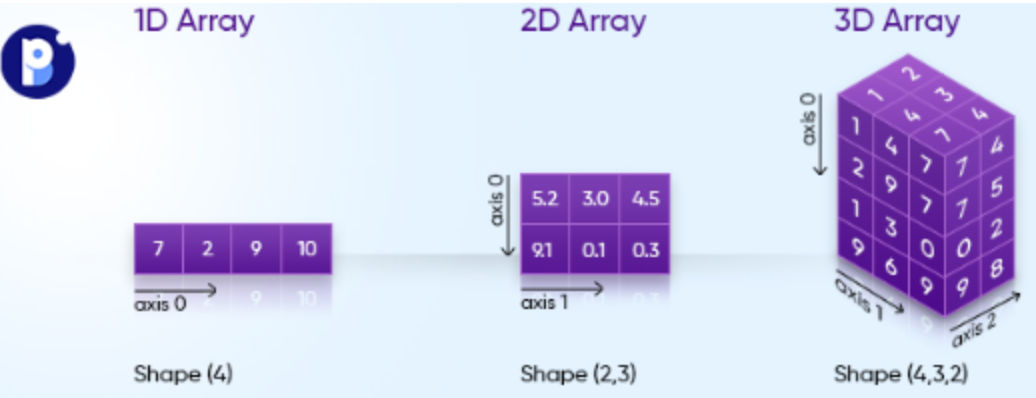
- 축의 '방향'을 뜻함
- axis = 0 => 위, 아래(행 방향)
- axis = 1 => 양 옆(열 방향)

In [74]:
#axis = 0, 기본값, 위/아래 연산, 행방향
score.sum()

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [75]:
#axis = 1, 양 옆 연산, 열방향
score.sum(axis=1)

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [76]:
#새로운 컬럼 추가
score['5반'] = [90,85,88,93,99]
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [77]:
score.loc['JS'] = [50,75,70,80,85]
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99
JS,50,75,70,80,85


In [78]:
#2반 기준으로 정렬
display(score.sort_values(by='2반',ascending=False))
display(score.sort_values(by='2반')[::-1])

,1반,2반,3반,4반,5반
과목,,,,,
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99
JS,50,75,70,80,85
파이썬,45,44,73,39,90


,1반,2반,3반,4반,5반
과목,,,,,
자바,47,92,45,69,88
DB,76,92,45,69,85
크롤링,92,81,85,40,93
Web,11,79,47,26,99
JS,50,75,70,80,85
파이썬,45,44,73,39,90


In [79]:
#열 삭제
del score['5반']

In [80]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26
JS,50,75,70,80


In [81]:
#loc으로 행 삭제 X
#DataFrame에서는 행에 대한 객체를 지원하지 않음(기본적으로 열(Series)에 대한 객체를 지원)
del score.loc['JS']

AttributeError: __delitem__

In [83]:
#drop() 함수 => 행을 삭제하는 기능
#inplace = False => 기본값, 즉시 적용하고자 하는 경우 True로 변경
score.drop('JS',inplace=True)

In [84]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [ ]:
#1.과목별 합계를 구해서 합계 컬럼 생성
#전체 데이터를 가지고 sum()함수를 적용시켰더니, 처음엔 추가하고 이후엔 갱신을 함
#갱신하면서 값이 누적되어버림 => 자칫하다간 오류를 범할 수 있음
#score['합계'] = score.sum(axis=1) == score.loc[:,:].sum(axis=1)

#정확한 슬라이싱 범위를 지정해야 누적을 피할 수 있음
score['합계'] = score.loc[:,:'4반'].sum(axis=1)
score

In [85]:
#2.반평균을 구해서 평균 행을 생성
score.loc['평균'] = score.loc[:'Web',:].mean()
score

,1반,2반,3반,4반
과목,,,,
파이썬,45.0,44.0,73.0,39.0
DB,76.0,92.0,45.0,69.0
자바,47.0,92.0,45.0,69.0
크롤링,92.0,81.0,85.0,40.0
Web,11.0,79.0,47.0,26.0
평균,54.2,77.6,59.0,48.6


In [86]:
#3.데이터 타입 => np.int64으로 변경
score = score.astype(np.int64)

In [87]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26
평균,54,77,59,48


In [ ]:
#max,min를 구하여 차이를 구해보기

In [ ]:
#1.반별 최대값을 최고점수(과목) 라는 행으로 추가
score.loc['최고점수(과목)']= score.loc[:'Web',:'4반'].max(axis=0)
score

In [ ]:
#2.반별 최소값을 최저점수(과목) 라는 행으로 추가
score.loc['최저점수(과목)']= score.loc[:'Web',:'4반'].min(axis=0)
score

In [ ]:
#3.과목별 최대값을 최고점수(반) 라는 열으로 추가
score['최고점수(반)'] = score.loc[:'Web',:'4반'].max(axis=1)
score

In [ ]:
#4.과목별 최저값을 최저점수(반) 라는 열으로 추가
score['최저점수(반)'] = score.loc[:'Web',:'4반'].min(axis=1)
score

In [ ]:
#과목별 최고점수(반)과 최저점수(반)의 차이를 구하기
score['최고점수(반)']-score['최저점수(반)']

### applymap(),apply()
- pandas 객체에 열 혹은 행에 대해 함수를 적용하게 해주는 함수
- apply() => 열 혹은 행에 대해 함수를 적용
- applymap() => 요소별에 대해 함수를 적용

In [ ]:
score = pd.read_csv('./data/score.csv',encoding='cp949',index_col='과목')
score

In [ ]:
#함수 정의(max-min)
def max_min(x) :
    return x.max()-x.min()

In [ ]:
#apply(함수명,axis=0)
#과목별 max-min
score['과목별MAX-MIN'] = score.loc[:'Web',:'4반'].apply(max_min,axis=1)
score

In [ ]:
#apply(함수명,axis=0)
#반별 max-min
score.loc['반별MAX-MIN'] = score.loc[:'Web',:'4반'].apply(max_min)
score

In [354]:
# apply 사용 예제
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Email': ['john@gmail.com', 'anna@yahoo.com', 'peter@gmail.com', 'linda@outlook.com']
}

In [355]:
df = pd.DataFrame(data)
df

,Name,Email
0,John,john@gmail.com
1,Anna,anna@yahoo.com
2,Peter,peter@gmail.com
3,Linda,linda@outlook.com


In [356]:
#각 email 부분에서 도메인을 추출해보자
#'@'기호를 기준으로 이메일 주소를 분할하는 함수를 정의
def str_split(x) :
    return x.split('@')[1]

In [360]:
df['Domain'] = df['Email'].apply(str_split)
df

,Name,Email,Domain
0,John,john@gmail.com,gmail.com
1,Anna,anna@yahoo.com,yahoo.com
2,Peter,peter@gmail.com,gmail.com
3,Linda,linda@outlook.com,outlook.com


In [249]:
score = pd.read_csv('./data/score.csv',encoding='cp949',index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [250]:
#apply() => 열이나 행에 대해 배열 형태로 적용되는 함수
#applymap() => 각 원소에 대해 적용되는 함수
def assign_grade(score) :
    if score  >= 80 :
        return 'A'
    elif score >= 60 :
        return 'B'
    elif score >= 40 :
        return 'C'
    elif score >= 20 :
        return 'D'
    else :
        return 'F'

In [252]:
score_grade = score.applymap(assign_grade)
score_grade

,1반,2반,3반,4반
과목,,,,
파이썬,C,C,B,D
DB,B,A,C,B
자바,C,A,C,B
크롤링,A,A,A,C
Web,F,B,C,D


### 2.6 병합
#### merge() => "병합"이라는 뜻
- 두 개의 pandas 객체를 합칠 때 특정 "컬럼"의 값을 기준으로 합치는 함수
- pd.merge(left,right,how='inner',on='컬럼명')
- left,right : 각각의 판다스 객체(DataFrame)
- how : 어떻게 병합할건지 방식 지정

In [253]:
data1 = {
    '이름': ['홍길동','이순신','신사임당'],
    '나이': ['23','55','48'],
    '성별':['남','남','여']
}

data2 = {
    '이름': ['홍길동','홍길동','홍길동','신사임당','장보고'],
    '영화': ['터미네이터','비긴어게인','살인의추억','비긴어게인','살인의추억'],
    '평점':['5','2','4','5','3']
}

In [254]:
#사람 정보
h_info = pd.DataFrame(data1)
h_info

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여


In [255]:
#영화 리뷰
r_info = pd.DataFrame(data2)
r_info

,이름,영화,평점
0,홍길동,터미네이터,5
1,홍길동,비긴어게인,2
2,홍길동,살인의추억,4
3,신사임당,비긴어게인,5
4,장보고,살인의추억,3


In [256]:
#merge() 사용
pd.merge(h_info,r_info,how='inner',on='이름')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5


In [257]:
#how : inner, left, right, outer

pd.merge(h_info,r_info,how='left',on='이름')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5


In [258]:
pd.merge(h_info,r_info,how='right',on='이름')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5
4,장보고,NaN,NaN,살인의추억,3


In [259]:
pd.merge(h_info,r_info,how='outer',on='이름')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5
5,장보고,NaN,NaN,살인의추억,3


#### concat() => "이어붙이다"라는 뜻
- concat() => "축의 방향"을 기준으로 병합
- merge()의 단점은 pandas 객체가 2ea까지만 가능 => concat은 이를 보완
- pd.concat([df1,df2,......], axis=0, join='outer',Ignore_index=False)
- axis : 병합할 축의 방향(기본값은 0)
- join : 어떻게 병합할건지 방식 지정
    - outer : 기본값, 합집합 형태로 반환
    - inner : 교집합 형태로 반환


In [260]:
data3 = {
    '이름': ['홍길동','이순신'],
    '나이': ['23','55'],
    '성별':['남','남']
}

data4 = {
    '이름': ['신사임당','장보고'],
    '나이': ['48','22'],
    '성별':['여','남']
}

In [264]:
df3 = pd.DataFrame(data3)
df3

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남


In [263]:
df4 = pd.DataFrame(data4)
df4

,이름,나이,성별
0,신사임당,48,여
1,장보고,22,남


In [269]:
#컬럼명이 동일한데 데이터가 다른 경우 axis=0(위 아래)으로 이어붙이기

#ignore_index : 원본에 있는 인덱스를 무시하고 새로 부여할 경우 True
pd.concat([df3,df4],axis=0,ignore_index=True)

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여
3,장보고,22,남


In [270]:
data5 = {
    '나이': ['23','55','48'],
    '성별':['남','남','여']
}

data6 = {
    '주소': ['서울','경기'],
    '학년': ['3','1']
}

In [274]:
df5 = pd.DataFrame(data5,index=['홍길동','이순신','신사임당'])
df5

,나이,성별
홍길동,23,남
이순신,55,남
신사임당,48,여


In [275]:
df6 = pd.DataFrame(data6,index=['홍길동','신사임당'])
df6

,주소,학년
홍길동,서울,3
신사임당,경기,1


In [276]:
#axis=1 => 양옆으로 이어붙이는데, 주로 컬럼명이 다를 때 활용
pd.concat([df5,df6],axis=1)

,나이,성별,주소,학년
홍길동,23,남,서울,3
이순신,55,남,NaN,NaN
신사임당,48,여,경기,1


In [277]:
#Series 병합
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series(['female','female','male','male','female'])
s3 = pd.Series([1,0,1,0,1])

In [281]:
titanic= pd.concat([s1,s2,s3],axis=1)
titanic.columns = ['PassengeID','Gender','Survived']
titanic

,PassengeID,Gender,Survived
0,1,female,1
1,2,female,0
2,3,male,1
3,4,male,0
4,5,female,1


### 2.7 groupby()함수
- 그룹별로 묶어서 집계를 낼 수 있게 하는 기능

In [284]:
#다중인덱싱
#groupby(by='컬럼명')

#성별을 기준으로 살아있는 사람(Survived가 1인 몇명인지)
titanic[['Gender','Survived']].groupby(by='Gender').sum()

,Survived
Gender,
female,2
male,1


In [285]:
titanic

,PassengeID,Gender,Survived
0,1,female,1
1,2,female,0
2,3,male,1
3,4,male,0
4,5,female,1


In [286]:
#성별과 생존 여부를 기준으로 생존자와 사망자 수를 보자
titanic.groupby(by=['Gender','Survived']).count()

PassengeID
Gender Survived            
female 0                  1
       1                  2
male   0                  1
       1                  1

#### 2.8 카테고리 생성하기
- 카테고리컬 데이터 라고도 부름

In [290]:
#나이 데이터로 카테고리 생성

#1. 데이터 생성
ages = [0,2,10,15,21,23,37,61,20,41,100,52,78]

#2.범주 생성
#0~19,20~47,48~60,61~
#※범주는 시작값을 포함하지 않음
bins = [-1,19,47,60,100]

#3.범주 명칭
name=['미성년자','청년','중년','노년']

#pd.cut([데이터],[범주],labels = 범주 명칭)
categori = pd.cut(ages,bins,labels=name)

#생성된 카테고리의 정보를 알려줌
#length : 데이터 길이
#범주의 개수 및 범주 정보
categori

['미성년자', '미성년자', '미성년자', '미성년자', '청년', ..., '청년', '청년', '노년', '중년', '노년']
Length: 13
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

In [294]:
#카테고리 활용
#ages DataFrame 화
age_df = pd.DataFrame(ages,columns=['나이'])
age_df['카테고리'] = categori

age_df

,나이,카테고리
0,0,미성년자
1,2,미성년자
2,10,미성년자
3,15,미성년자
4,21,청년
5,23,청년
6,37,청년
7,61,노년
8,20,청년
9,41,청년


In [295]:
#values_counts() => 각각의 데이터들의 개수가 몇 개인지
age_df['카테고리'].value_counts()

청년      5
미성년자    4
노년      3
중년      1
Name: 카테고리, dtype: int64

### Pandas  최종 실습
- 2019년~2021년 광주광역시 범죄 현황 데이터를 이용해서 작년대비 지역별 범죄 증감율을 구해보자
- 범죄 증감율 공식
    - (올해-작년)/작년 * 100


In [377]:
data2019 = pd.read_csv("./data/2019.csv", encoding='euc-kr',index_col='관서명')
data2020 = pd.read_csv("./data/2020.csv", encoding='euc-kr',index_col='관서명')
data2021 = pd.read_csv("./data/2021.csv", encoding='euc-kr',index_col='관서명')

In [378]:
print(data2019.shape)
print(data2020.shape)
print(data2021.shape)

(36, 6)
(36, 6)
(42, 6)


In [379]:
#행 개수가 다른 DataFrame 데이터 삭제
data2021.drop('광주지방경찰청',inplace=True)

In [380]:
data2021.index.unique()

Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')

In [381]:
d2019 = data2019.copy()
d2020 = data2020.copy()
d2021 = data2021.copy()

In [382]:
data2019[data2019['구분'] == '발생건수']

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주동부경찰서,발생건수,3,5,92,1100,1155
광주서부경찰서,발생건수,5,10,172,2050,2483
광주남부경찰서,발생건수,1,3,70,962,1081
광주북부경찰서,발생건수,5,14,256,2570,2621
광주광산경찰서,발생건수,4,12,160,1743,2253


In [330]:
data2019.columns = ['2019총계']

data2019

,2019총계
관서명,
광주지방경찰청계,18830
광주동부경찰서,2355
광주서부경찰서,4720
광주남부경찰서,2117
광주북부경찰서,5466
광주광산경찰서,4172


In [338]:
data2020 = data2020[data2020['구분'] == '발생건수'].sum(axis=1)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_7680\3988064520.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2020 = data2020[data2020['구분'] == '발생건수'].sum(axis=1)


In [339]:
data2021 = data2021[data2021['구분'] == '발생건수'].sum(axis=1)

C:\Users\smhrd\AppData\Local\Temp\ipykernel_7680\54627996.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2021 = data2021[data2021['구분'] == '발생건수'].sum(axis=1)


In [345]:
data2020 = pd.DataFrame(data2020)
data2020.columns = ['2020총계']

data2020

,2020총계
관서명,
광주지방경찰청계,15416
광주동부경찰서,2068
광주서부경찰서,3892
광주남부경찰서,1865
광주북부경찰서,4148
광주광산경찰서,3443


In [346]:
data2021 = pd.DataFrame(data2021)
data2021.columns = ['2021총계']

In [347]:
display(data2019)
display(data2020)
display(data2021)


,2019총계
관서명,
광주지방경찰청계,18830
광주동부경찰서,2355
광주서부경찰서,4720
광주남부경찰서,2117
광주북부경찰서,5466
광주광산경찰서,4172


,2020총계
관서명,
광주지방경찰청계,15416
광주동부경찰서,2068
광주서부경찰서,3892
광주남부경찰서,1865
광주북부경찰서,4148
광주광산경찰서,3443


,2021총계
관서명,
광주지방경찰청계,13949
광주동부경찰서,1799
광주서부경찰서,3638
광주남부경찰서,1547
광주북부경찰서,3945
광주광산경찰서,3020


In [350]:
crime = pd.concat([data2019,data2020,data2021],axis=1)
crime

,2019총계,2020총계,2021총계
관서명,,,
광주지방경찰청계,18830,15416,13949
광주동부경찰서,2355,2068,1799
광주서부경찰서,4720,3892,3638
광주남부경찰서,2117,1865,1547
광주북부경찰서,5466,4148,3945
광주광산경찰서,4172,3443,3020


In [351]:
def rate(x) :
    return (x-y)/x * 100

In [365]:
crime['2019~2020증감율']= (crime['2020총계']-crime['2019총계']) / crime['2019총계'] * 100 

In [367]:
crime['2020~2021증감율']= (crime['2021총계']-crime['2020총계']) / crime['2020총계'] * 100 

In [368]:
crime

,2019총계,2020총계,2021총계,2019~2020증감율,2020~2021증감율
관서명,,,,,
광주지방경찰청계,18830,15416,13949,-18.130643,-9.516087
광주동부경찰서,2355,2068,1799,-12.186837,-13.007737
광주서부경찰서,4720,3892,3638,-17.542373,-6.526208
광주남부경찰서,2117,1865,1547,-11.903637,-17.050938
광주북부경찰서,5466,4148,3945,-24.112697,-4.893925
광주광산경찰서,4172,3443,3020,-17.473634,-12.285797


In [370]:
crime.columns.tolist()

['2019총계', '2020총계', '2021총계', '2019~2020증감율', '2020~2021증감율']

In [373]:
crime = crime[['2019총계','2019~2020증감율', '2020총계','2020~2021증감율', '2021총계']]

In [374]:
crime

,2019총계,2019~2020증감율,2020총계,2020~2021증감율,2021총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [383]:
display(d2019)
display(d2020)
display(d2021)

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618
광주지방경찰청계,기타,7,7,223,548,6098
광주동부경찰서,발생건수,3,5,92,1100,1155
광주동부경찰서,검거건수,4,6,86,583,970
광주동부경찰서,검거인원,4,7,98,447,1483


,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599
광주지방경찰청계,검거건수,18,47,713,4242,7631
광주지방경찰청계,검거인원,21,54,758,3455,10747
광주지방경찰청계,구속,14,25,37,132,57
광주지방경찰청계,불구속,3,25,491,2862,5267
광주지방경찰청계,기타,4,4,230,461,5423
광주동부경찰서,발생건수,3,8,83,832,1142
광주동부경찰서,검거건수,3,7,70,679,1002
광주동부경찰서,검거인원,4,10,71,543,1497


,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주동부경찰서,발생건수,3,5,77,624,1090
광주동부경찰서,검거건수,3,5,70,470,953
광주동부경찰서,검거인원,4,4,76,483,1538


In [400]:
crime2019 = d2019[d2019['구분'] == '발생건수'].loc[:,'살인':].sum(axis=1)
type(crime2019)

pandas.core.series.Series

In [401]:
crime2020 = d2020[d2020['구분'] == '발생건수'].loc[:,'살인':].sum(axis=1)
crime2021 = d2019[d2021['구분'] == '발생건수'].loc[:,'살인':].sum(axis=1)

In [402]:
display(crime2019)
display(crime2020)
display(crime2021)

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
dtype: int64

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [ ]:
import pandas as pd

# 1. 데이터 불러오기와 전처리 함수
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, encoding='euc-kr', index_col='관서명')
    data = data[data['구분']=='발생건수']
    return data

# 2. 범죄 총계 계산 함수
def calculate_total_crime(data, year):
    total_crime = data.loc[:, '살인':'폭력'].sum(axis=1)
    total_crime.name = f'{year}총계'
    return total_crime

# 3. 증감율 계산 함수
def calculate_increase_rate(prev_year, curr_year, year1, year2):
    increase_rate = ((curr_year - prev_year) / prev_year) * 100
    increase_rate.name = f'{year1}~{year2} 범죄증감율'
    return increase_rate

# 4. 데이터 병합 함수
def merge_data(*args):
    return pd.concat(args, axis=1)

# 데이터 불러오기
data2019 = load_and_preprocess_data('../data/2019.csv')
data2020 = load_and_preprocess_data('../data/2020.csv')
data2021 = load_and_preprocess_data('../data/2021.csv')

# 범죄 총계 계산
total_crime_2019 = calculate_total_crime(data2019, 2019)
total_crime_2020 = calculate_total_crime(data2020, 2020)
total_crime_2021 = calculate_total_crime(data2021, 2021)

# 증감율 계산
increase_rate_1920 = calculate_increase_rate(total_crime_2019, total_crime_2020, 2019, 2020)
increase_rate_2021 = calculate_increase_rate(total_crime_2020, total_crime_2021, 2020, 2021)

# 데이터 병합
crime_data = merge_data(total_crime_2019, increase_rate_1920, total_crime_2020, increase_rate_2021, total_crime_2021)

# 결과 출력
crime_data